##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.naive_bayes import CategoricalNB,ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_curve, auc

##Load the data
Note: This Data does not have the column names. So we will set the column names as per the reference PDF


In [2]:
Cols=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']
Data=pd.read_excel('/content/drive/MyDrive/DAL dataset/Assignment 3/adult.xlsx',header=None)
Data = Data.replace(r"^ +| +$", r"", regex=True)#for eliminating leading or training white space

##Studying the data

In [3]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
Data.columns=Cols

In [5]:
Data.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Apparently no missing values. But there are missing values in the form of ? under object type data

In [7]:
#Categorical columns
Cat_col=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

checking the unique values in the categorical columns

In [8]:
for cat in Cat_col:
  print(Data[cat].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Only these 3 columns have ? marks 'Workclass', 'Occupations', 'Native country'

Modifying the Income column entries for plotting purpose

In [9]:
for i in range(len(Data['Income'])):
  Data.loc[i,'Income']=Data.loc[i,'Income']+' USD'

In [10]:
#We will replace the '?' marks using NAN
cols_with_qnmark=['Workclass','Occupation','Native_country']
for col in cols_with_qnmark:
  Data[col].replace('?',np.NaN,inplace=True)
Data.info()#We are replacing this with Nan so that it does not interfere with plotting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


These revels how many missing entries are there in the data ,only in those three categorical columns namely workclass,occupation, native country

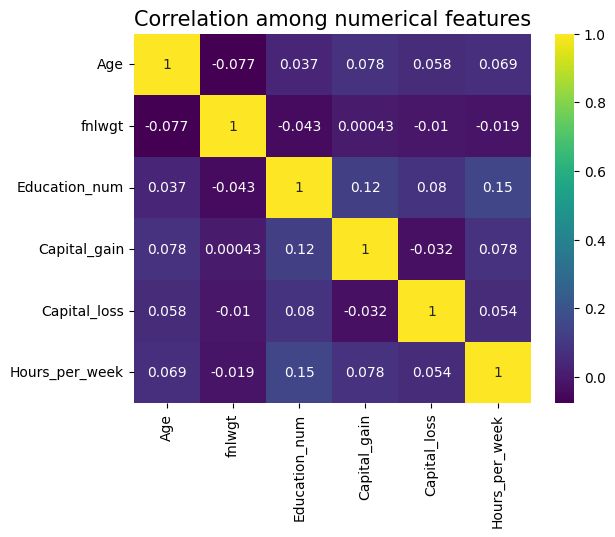

In [11]:
#Check correlation
Correlation=Data.corr(numeric_only=True)
sns.heatmap(Correlation,annot=True,cmap='viridis')
plt.title("Correlation among numerical features",fontsize=15)
plt.show()

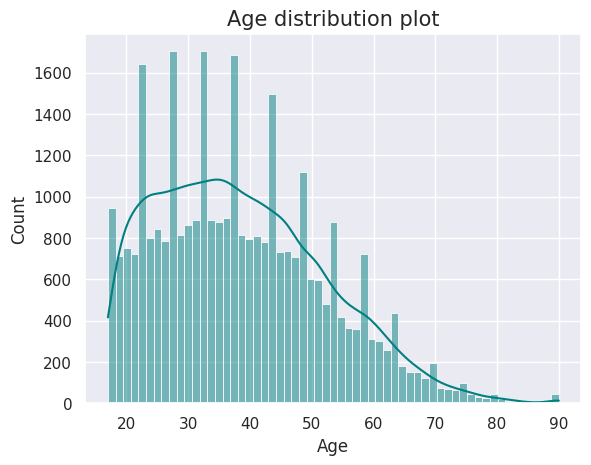

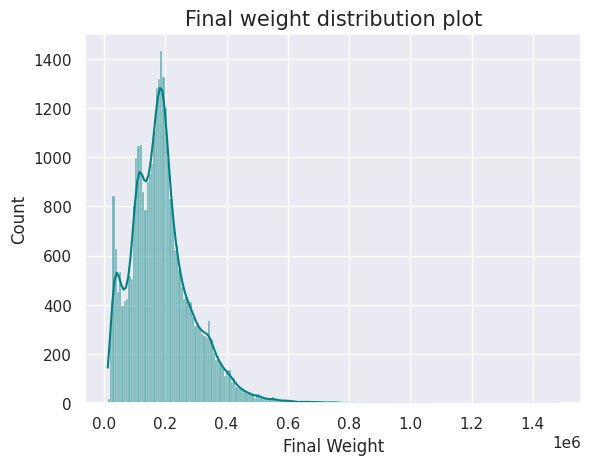

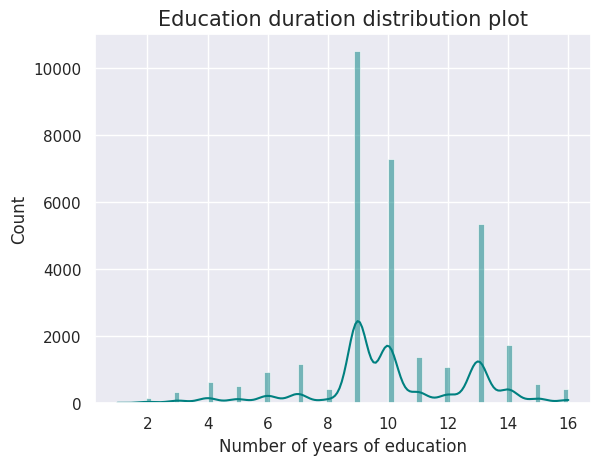

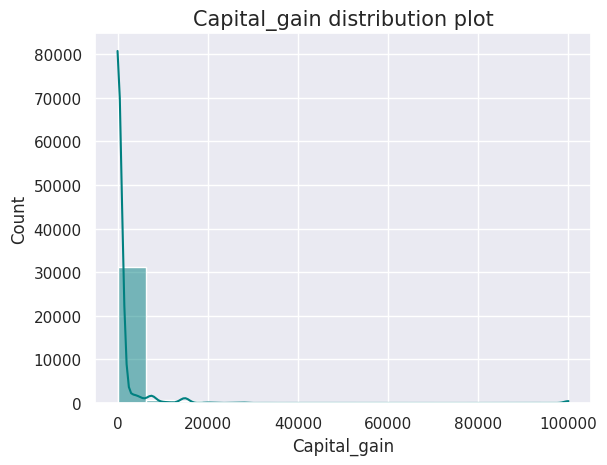

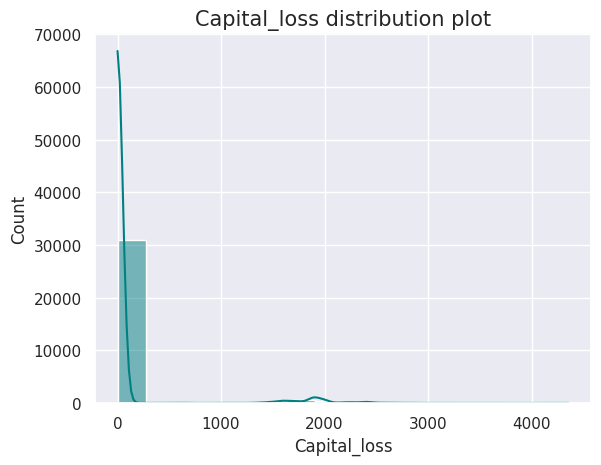

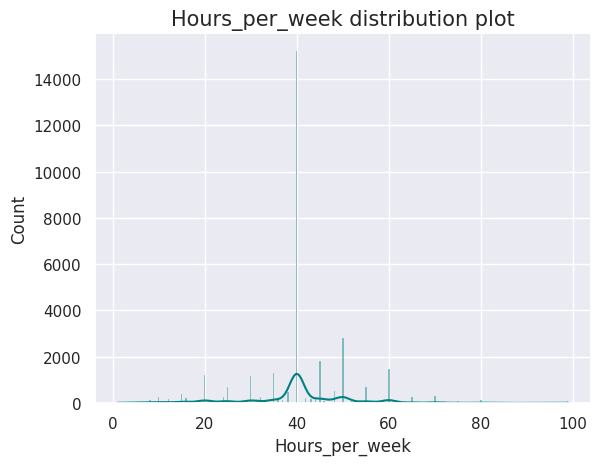

In [12]:
#Check the distributions
Num_cols=['Age','fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
sns.set()
for num in Num_cols:
  if num=='fnlwgt':
    plt.xlabel('Final Weight')
    plt.title("Final weight distribution plot",fontsize=15)
  elif num=='Education_num':
    plt.xlabel('Number of years of education')
    plt.title("Education duration distribution plot",fontsize=15)
  else:
    plt.title(f"{num} distribution plot",fontsize=15)
  sns.histplot(data=Data,x=num,kde=True,color='teal')
  plt.show()

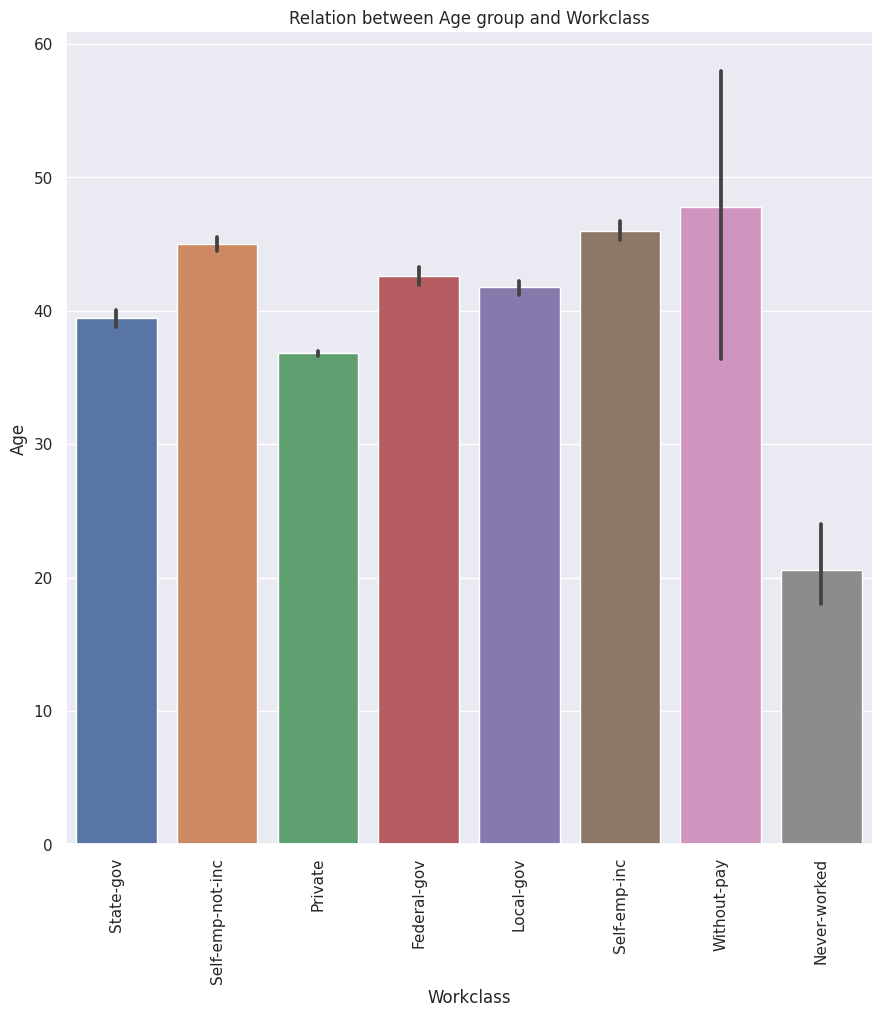

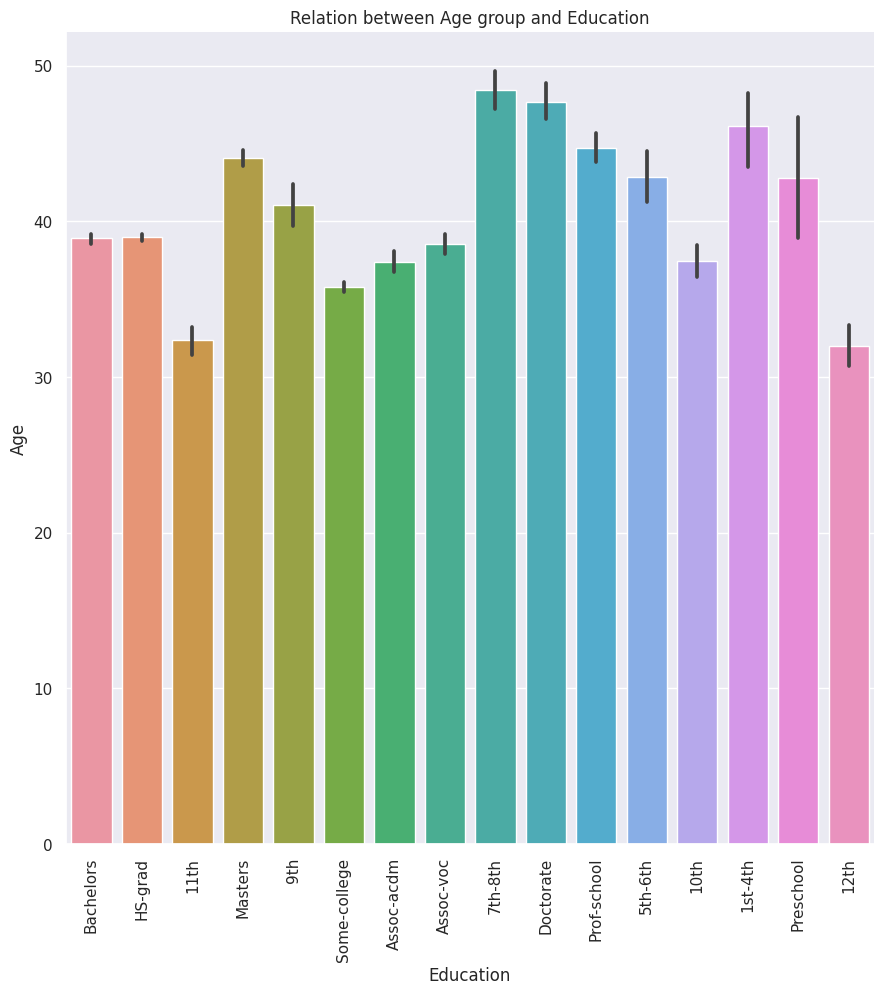

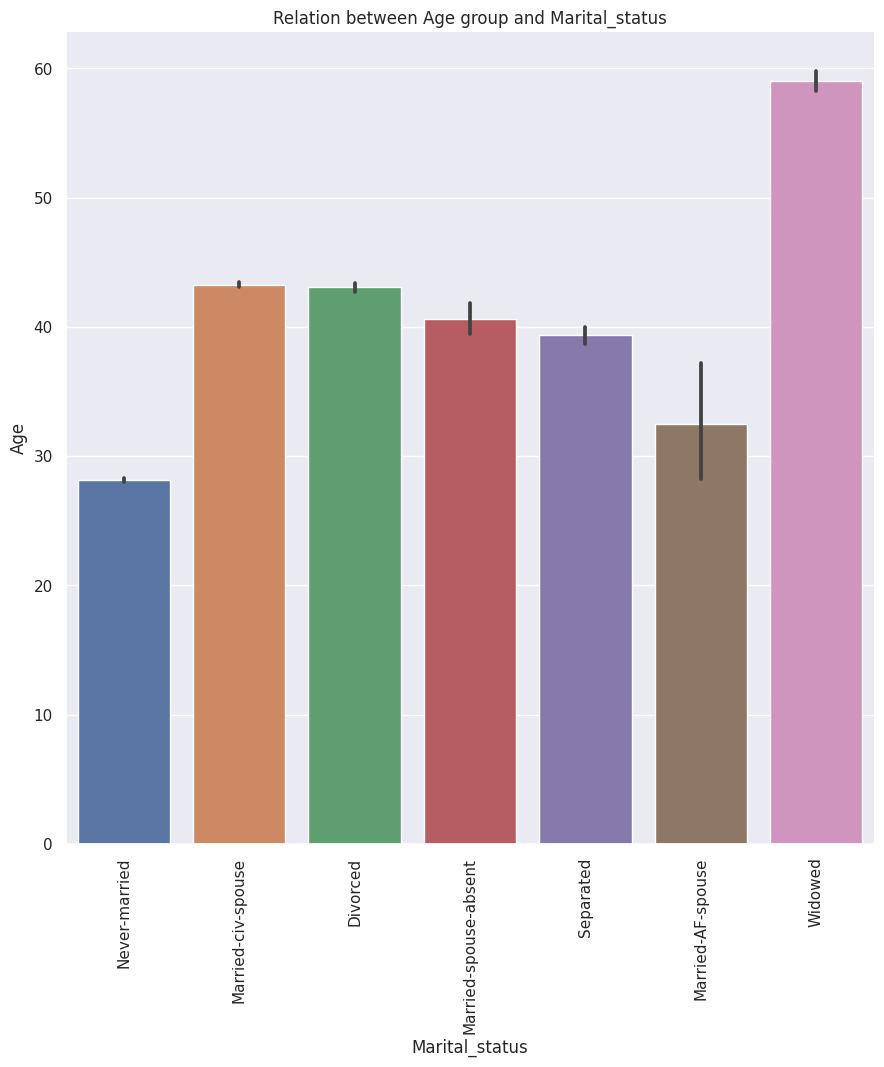

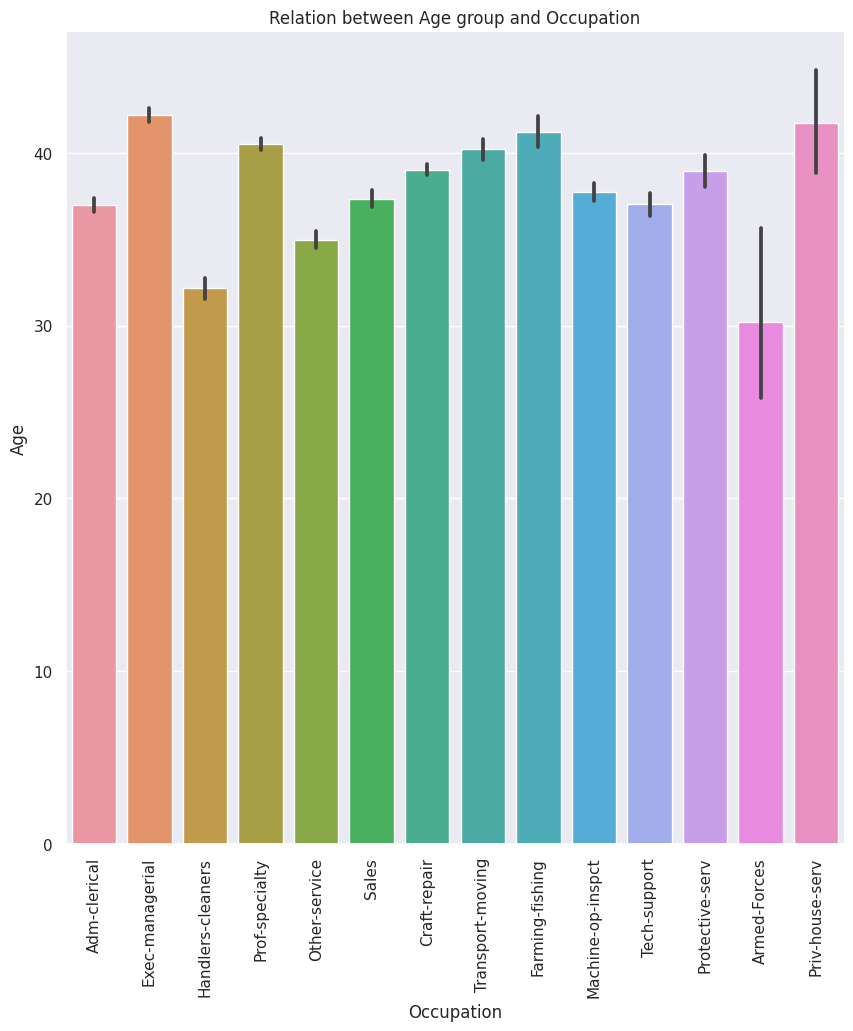

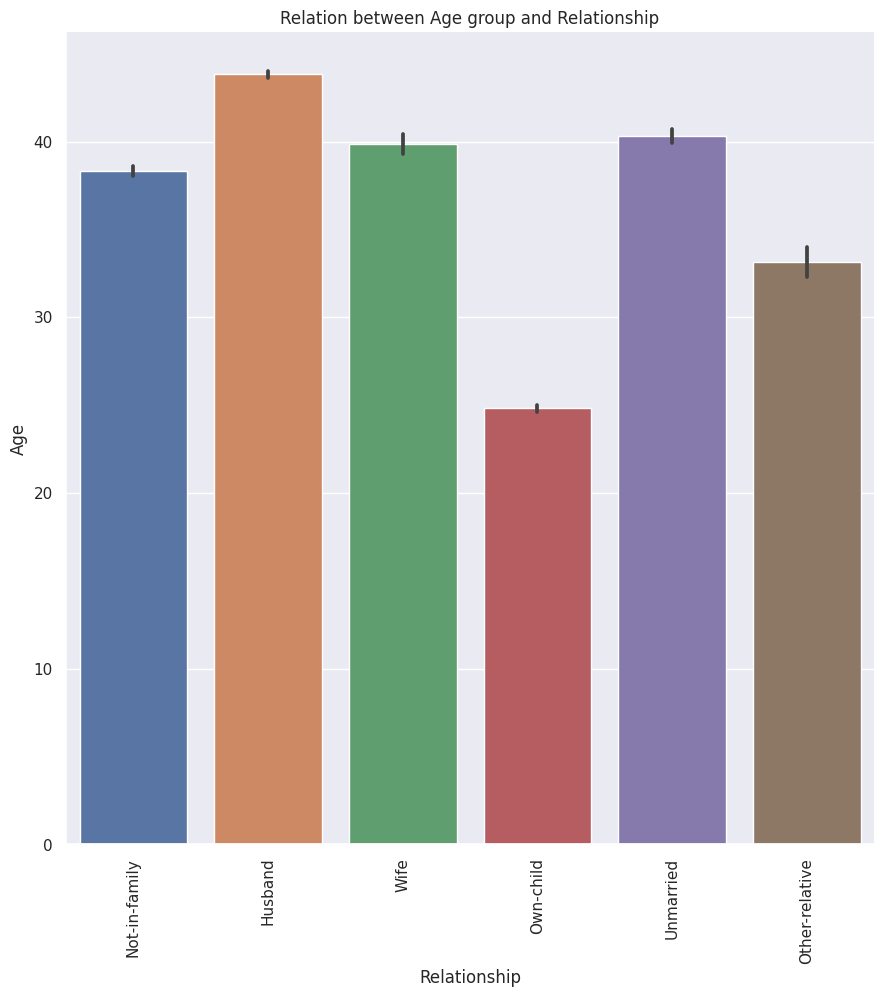

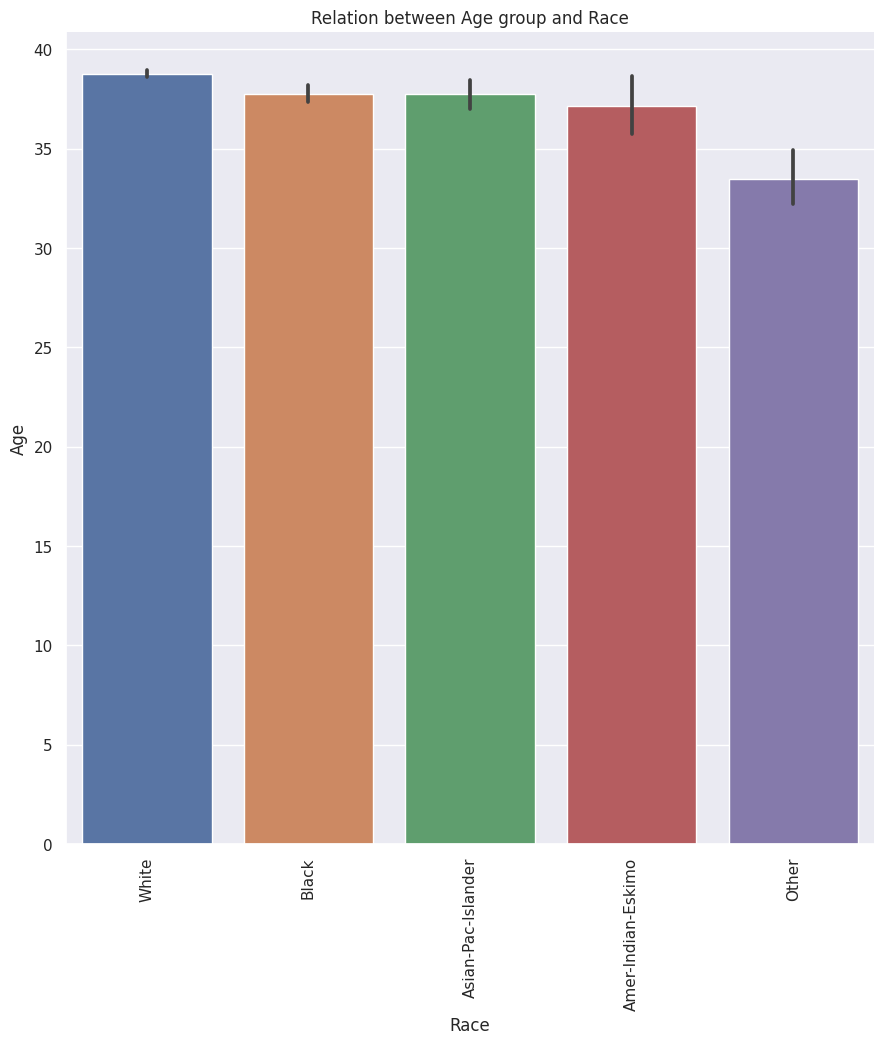

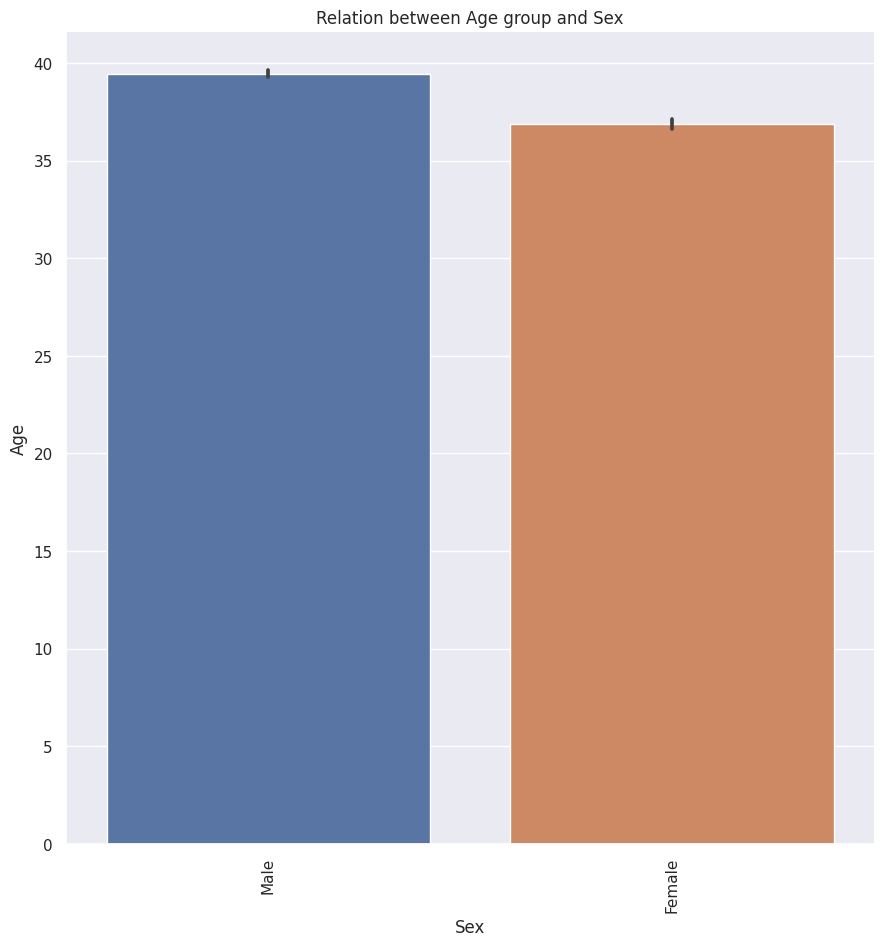

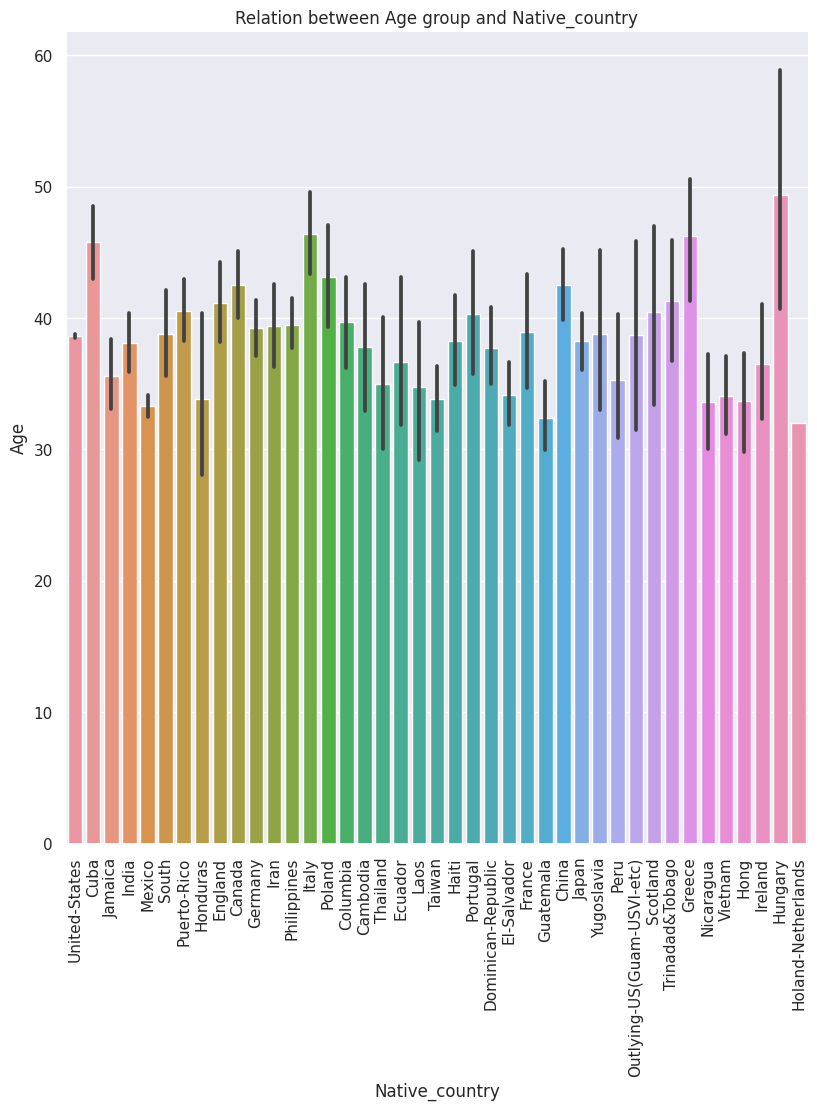

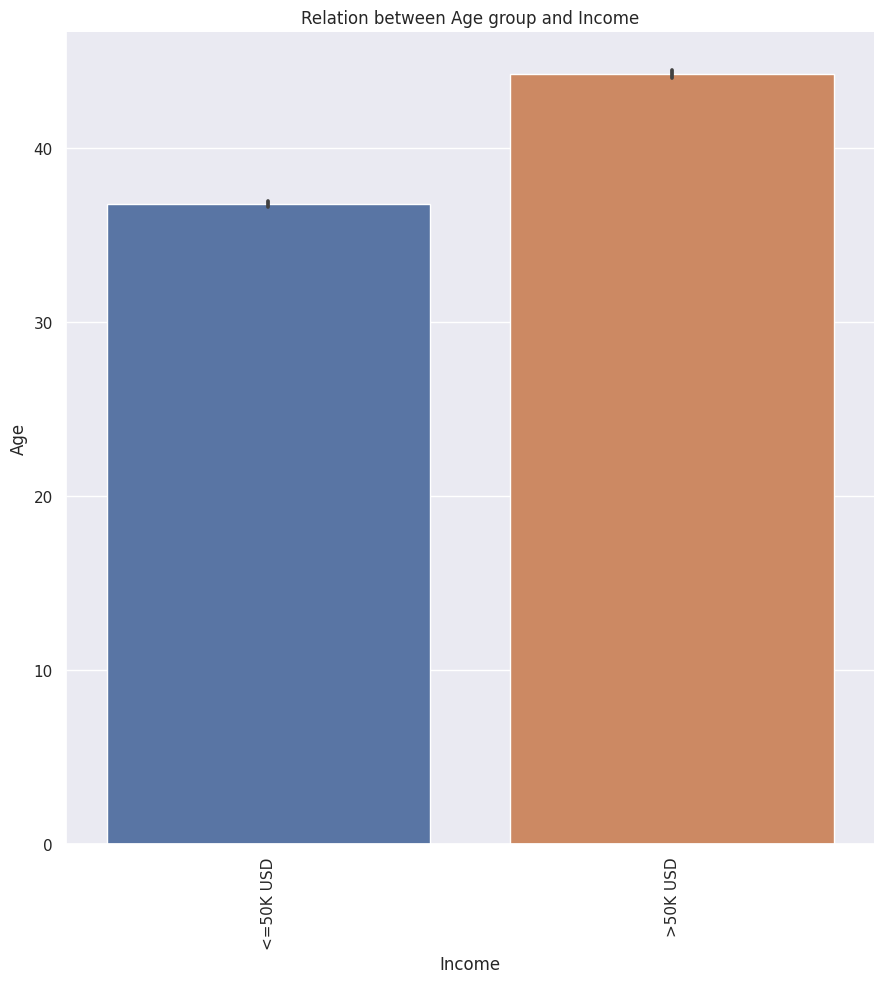

In [13]:
sns.set()
#check the relation between age and categorical columns
for cat_col in Cat_col:
  sns.catplot(data=Data,x=cat_col,y='Age',kind='bar',height=9)
  plt.title(f"Relation between Age group and {cat_col}")
  plt.xticks(rotation=90)
  plt.show()

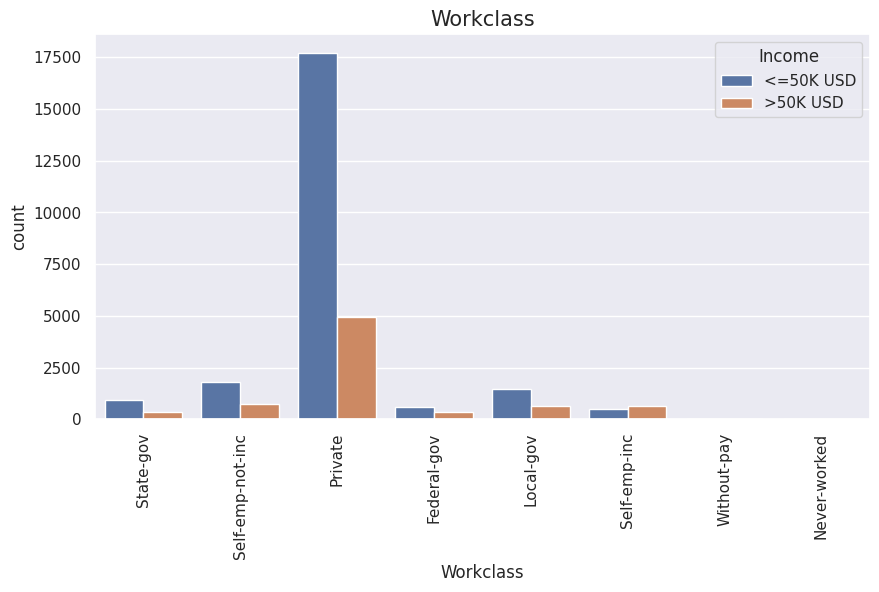

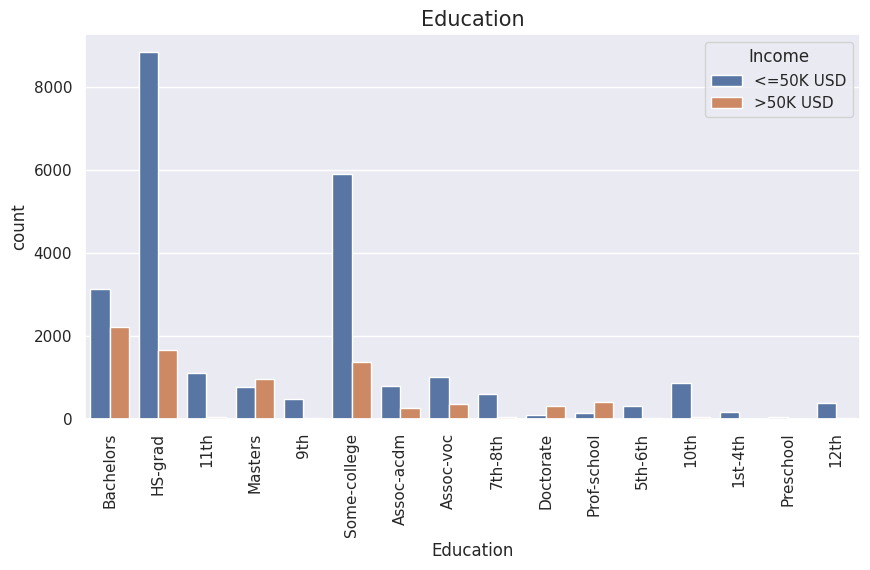

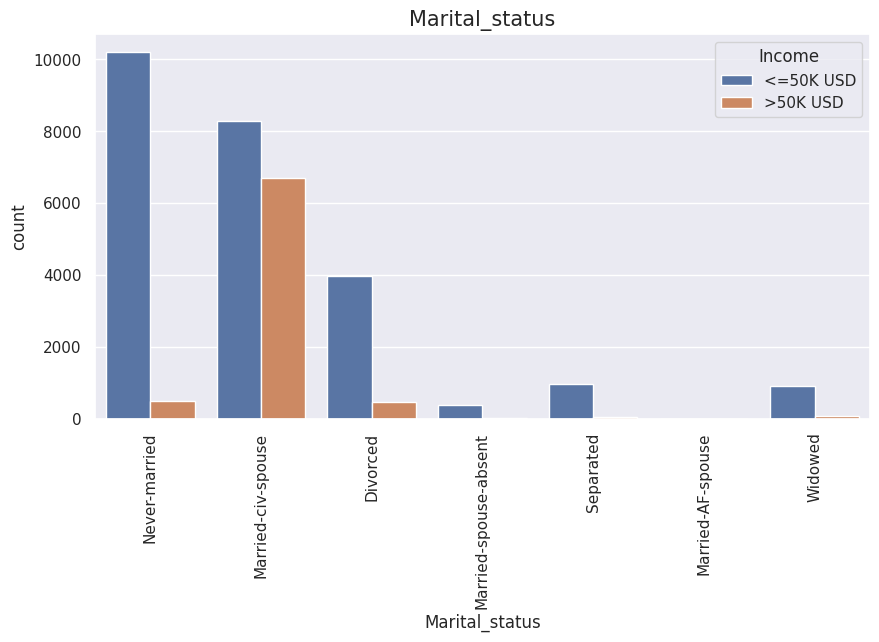

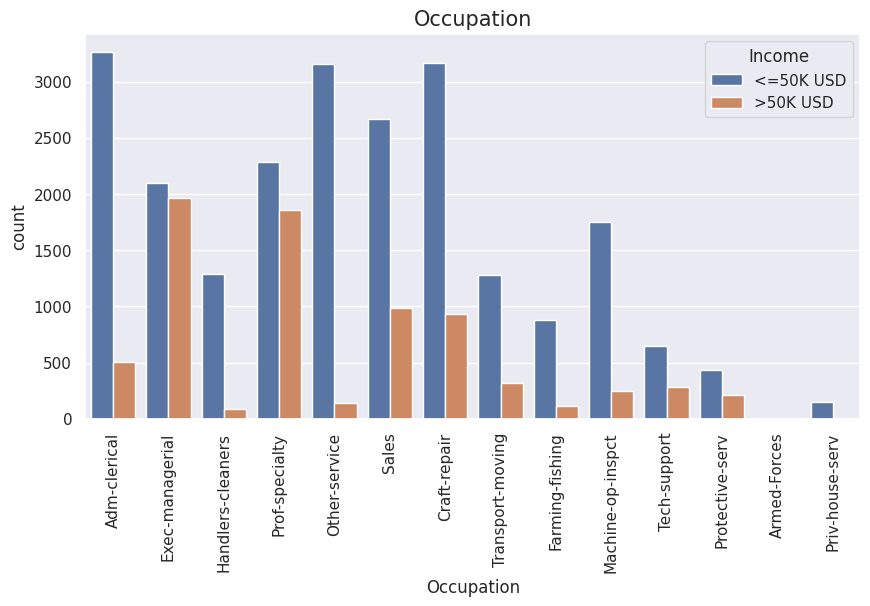

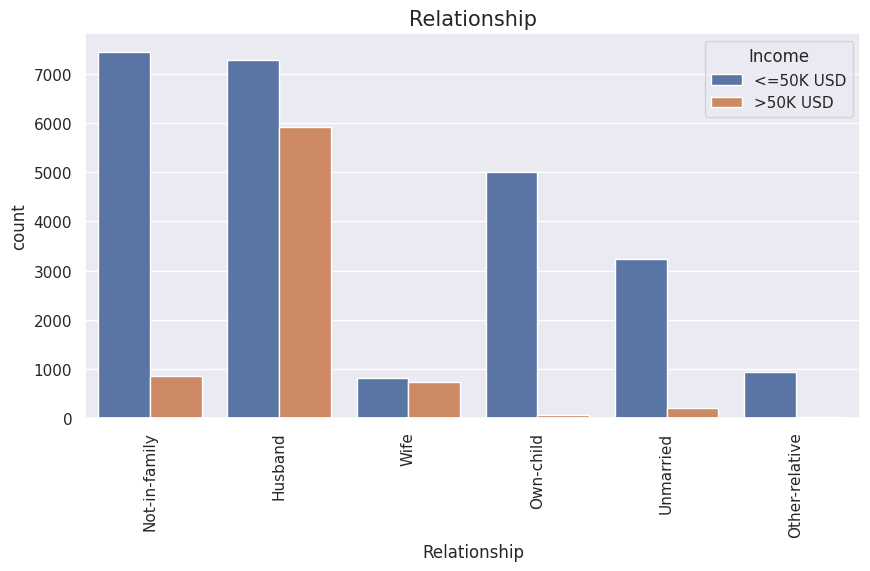

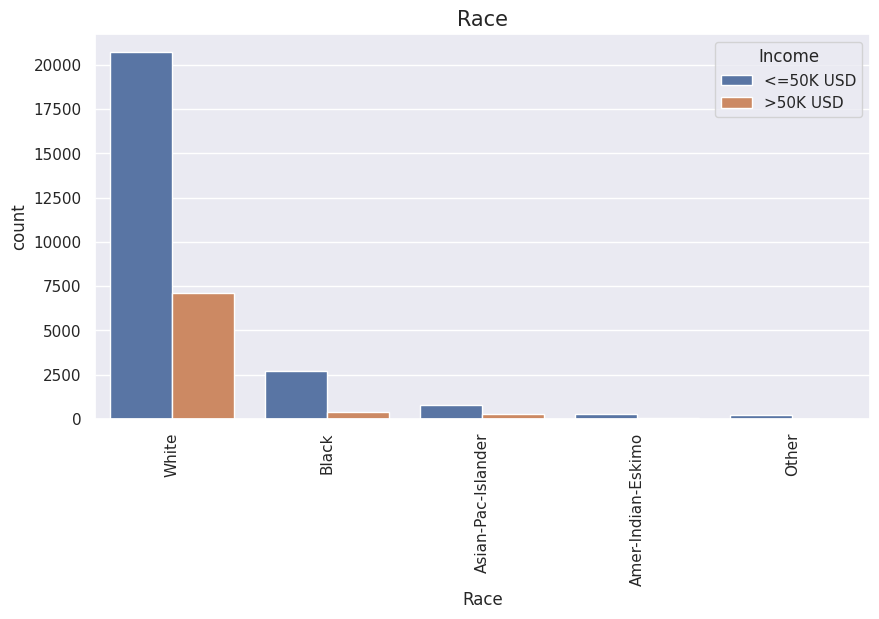

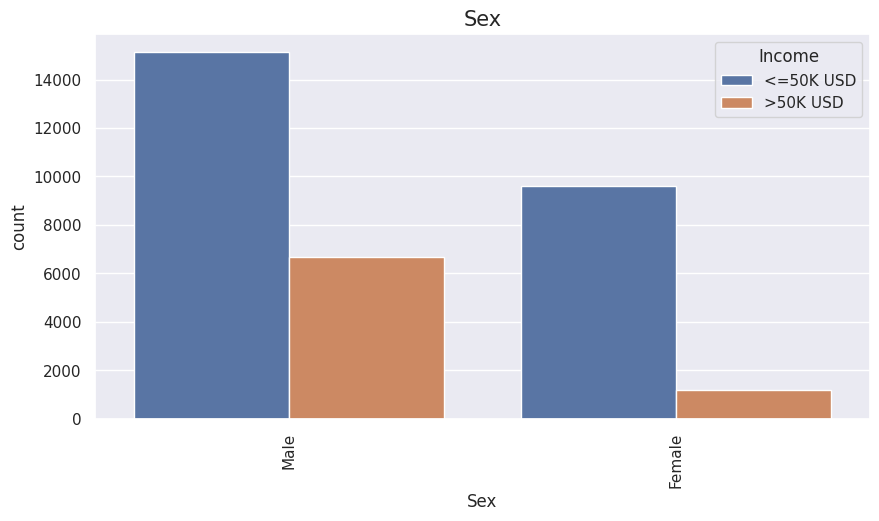

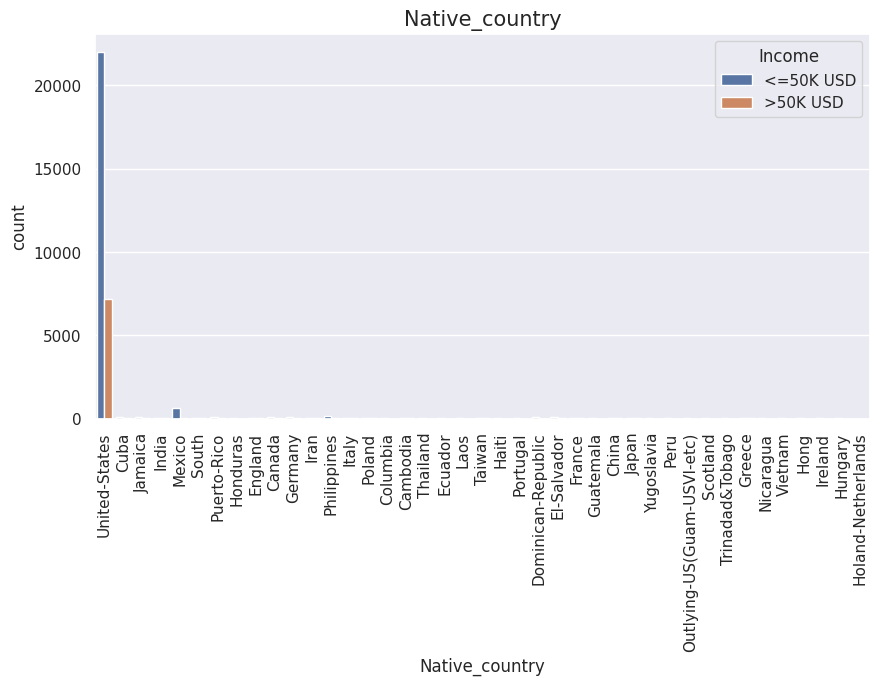

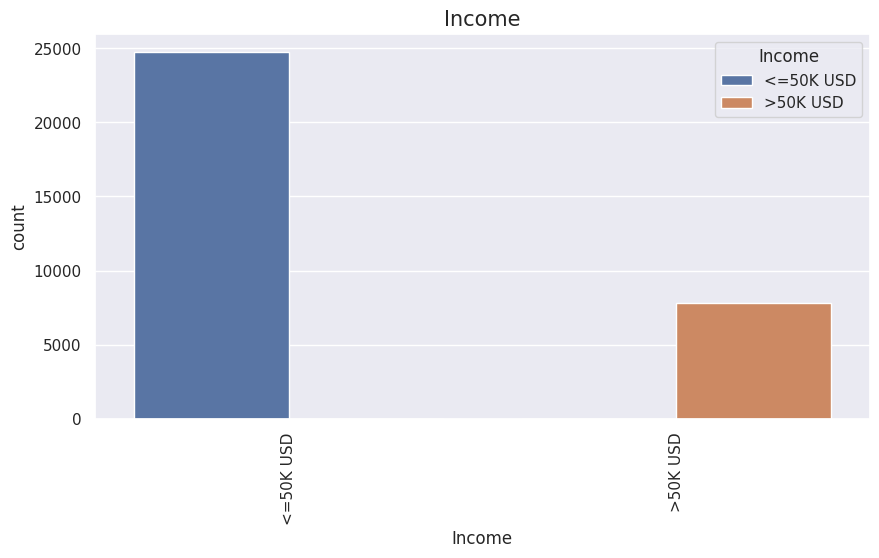

In [14]:
sns.set()
#check the bar plots for categorical features
for cat in Cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=cat,data=Data,hue='Income')
  plt.title(cat,fontsize=15)
  plt.xticks(rotation=90)
  plt.show()

##Handling the NaN values


In [15]:
#First drop the target column
Target=Data.pop('Income')

In [16]:
Target.value_counts()

<=50K USD    24720
>50K USD      7841
Name: Income, dtype: int64

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  31978 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [18]:
#replacing the NA values with question mark once again for imputation purpose
Data.fillna('?',inplace=True)

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [20]:
#Dropping the categorical columns hacving the question mark
Cat_miss_cols=['Workclass','Occupation','Native_country']
Dropped_cat_col=Data[Cat_miss_cols]
Data.drop(Cat_miss_cols,axis=1,inplace=True)

In [21]:
Data.info()#check the data again before fitting the K protos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   Education       32561 non-null  object
 3   Education_num   32561 non-null  int64 
 4   Marital_status  32561 non-null  object
 5   Relationship    32561 non-null  object
 6   Race            32561 non-null  object
 7   Sex             32561 non-null  object
 8   Capital_gain    32561 non-null  int64 
 9   Capital_loss    32561 non-null  int64 
 10  Hours_per_week  32561 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.7+ MB


In [22]:
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=1)
# Fit the K-Prototypes model using the entire dataset except the target and the missing columns
clusters = kproto.fit_predict(Data,categorical=[2,4,5,6,7])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4738, ncost: 67358719670529.41
Run: 1, iteration: 2/100, moves: 2401, ncost: 64741859139517.086
Run: 1, iteration: 3/100, moves: 1704, ncost: 63648839945569.06
Run: 1, iteration: 4/100, moves: 1561, ncost: 62927036071645.72
Run: 1, iteration: 5/100, moves: 1713, ncost: 62108313276383.39
Run: 1, iteration: 6/100, moves: 1918, ncost: 61075917848665.25
Run: 1, iteration: 7/100, moves: 2062, ncost: 59843027030979.5
Run: 1, iteration: 8/100, moves: 2088, ncost: 58531898755342.914
Run: 1, iteration: 9/100, moves: 1847, ncost: 57431860225213.08
Run: 1, iteration: 10/100, moves: 1520, ncost: 56395322137720.71
Run: 1, iteration: 11/100, moves: 1217, ncost: 55439957198057.02
Run: 1, iteration: 12/100, moves: 875, ncost: 54886104767282.62
Run: 1, iteration: 13/100, moves: 604, ncost: 54615693666268.555
Run: 1, 

In [23]:
Data['Cluster'] = clusters

In [24]:
np.unique(clusters)

array([0, 1, 2, 3], dtype=uint16)

In [25]:
Data[Cat_miss_cols]=Dropped_cat_col

In [26]:
for cluster_id in range(4):  # Assuming 3 clusters
    cluster_data = Data[Data['Cluster'] == cluster_id]

    # Mode for each categorical variable
    cluster_modes = cluster_data.mode().iloc[0]

    # Impute missing values for the cluster
    for col in Cat_miss_cols:
       Data.loc[Data['Cluster'] == cluster_id,col]=Data[Data['Cluster'] == cluster_id][col].replace('?', cluster_modes[col])

In [27]:
Data.drop('Cluster',axis=1,inplace=True)#Now drop the cluster column

In [28]:
Num_cols=['Age','fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Data[Num_cols]=Data[Num_cols].astype(str)#to perform ohe on numerical data we have type cast them to the string first

In [29]:
Data#Recheck the data

,Age,fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass,Occupation,Native_country
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,State-gov,Adm-clerical,United-States
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,Self-emp-not-inc,Exec-managerial,United-States
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,Private,Handlers-cleaners,United-States
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,Private,Handlers-cleaners,United-States
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Private,Prof-specialty,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,Private,Tech-support,United-States
32557,40,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,Private,Machine-op-inspct,United-States
32558,58,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,Private,Adm-clerical,United-States
32559,22,201490,HS-grad,9,Never-married,Own-child,White,Male,0,0,20,Private,Adm-clerical,United-States


In [30]:
OHE_data=pd.get_dummies(Data,prefix_sep='*')#Perform One hot encoding on the data
#OHE_target=pd.get_dummies(Target,drop_first=True)

In [31]:
OHE_data.columns#Reviewing the newly formed columns

Index(['Age*17', 'Age*18', 'Age*19', 'Age*20', 'Age*21', 'Age*22', 'Age*23',
       'Age*24', 'Age*25', 'Age*26',
       ...
       'Native_country*Portugal', 'Native_country*Puerto-Rico',
       'Native_country*Scotland', 'Native_country*South',
       'Native_country*Taiwan', 'Native_country*Thailand',
       'Native_country*Trinadad&Tobago', 'Native_country*United-States',
       'Native_country*Vietnam', 'Native_country*Yugoslavia'],
      dtype='object', length=22141)

In [32]:
#Perform train test split with split size 0.25 for test
X_train,X_test,y_train,y_test=train_test_split(OHE_data,Target,test_size=0.25,random_state=100,stratify=Target)

In [33]:
clf=ComplementNB(force_alpha='warn',class_prior=[0.65,0.35])#call the model with class priors for better working with unbalanced data

In [34]:
clf.fit(X_train,y_train)#fit the model

ComplementNB(class_prior=[0.65, 0.35])

In [35]:
clf.score(X_train,y_train)#train set sccuracy

0.8772317772317773

In [36]:
clf.score(X_test,y_test)#Test set accuracy

0.8342955410883184

In [37]:
y_test_hat=clf.predict(X_test)#get the prediction on the test set

##Model Evaluation

In [38]:
y_train_hat=clf.predict(X_train)#get the prediction on the train set
#Train set report
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

   <=50K USD       0.95      0.89      0.92     18539
    >50K USD       0.71      0.84      0.77      5881

    accuracy                           0.88     24420
   macro avg       0.83      0.87      0.84     24420
weighted avg       0.89      0.88      0.88     24420



In [39]:
#Test set report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

   <=50K USD       0.93      0.85      0.89      6181
    >50K USD       0.62      0.80      0.70      1960

    accuracy                           0.83      8141
   macro avg       0.78      0.82      0.79      8141
weighted avg       0.85      0.83      0.84      8141



##Check the confusion matrix in the test set

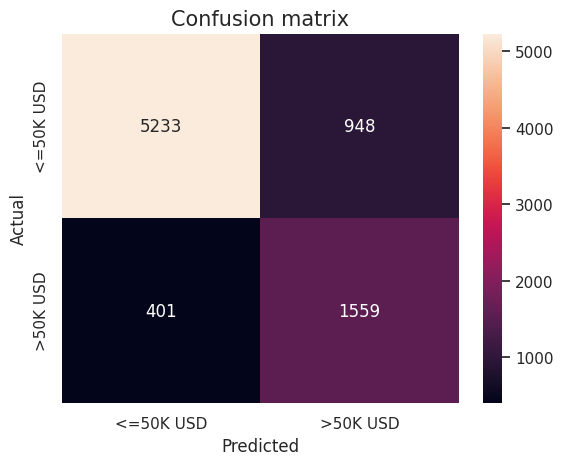

In [40]:
cm = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion matrix",fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5,1.5],labels=['<=50K USD','>50K USD'])
plt.yticks(ticks=[0.5,1.5],labels=['<=50K USD','>50K USD'])
plt.show()

In [41]:
y_test_num=[1 if i=='>50K USD' else 0 for i in y_test]
y_test_hat_num=[1 if i=='>50K USD' else 0 for i in y_test_hat]

In [43]:
yhat_test_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test_num,yhat_test_prob)
print("Area of ROC for test set is",auc(fpr,tpr))# area under ROC curve

Area of ROC for test set is 0.9135561909604482


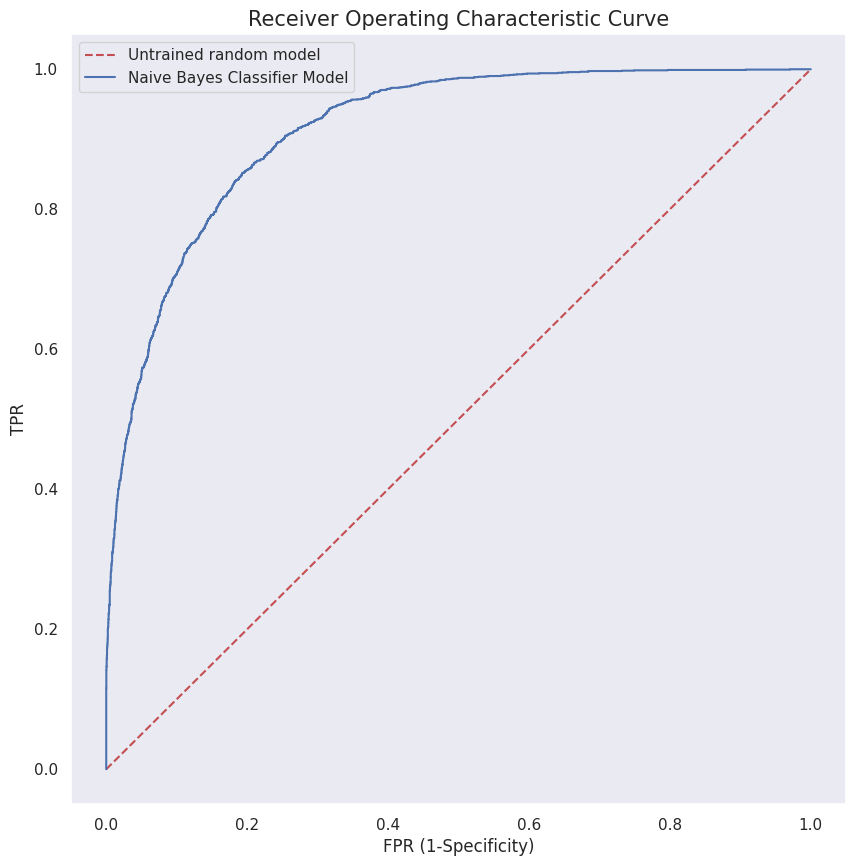

In [44]:
#Plot the roc
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--',label='Untrained random model')
plt.plot(fpr,tpr,label='Naive Bayes Classifier Model')
plt.title("Receiver Operating Characteristic Curve",fontsize=15)
plt.ylabel("TPR")
plt.xlabel("FPR (1-Specificity)")
plt.legend()
plt.grid()
plt.show()

In [45]:
#Retrieve the data from X_train and X_test for plotting
X_test_undummified=Data.loc[X_test.index]
X_train_undummified=Data.loc[X_train.index]
X_test_undummified[Num_cols]=X_test_undummified[Num_cols].astype('float64')
X_train_undummified[Num_cols]=X_train_undummified[Num_cols].astype('float64')

In [46]:
X_test_undummified['Income']=y_test_hat
X_train_undummified['Income']=y_train

##Plot the distribution for trainset

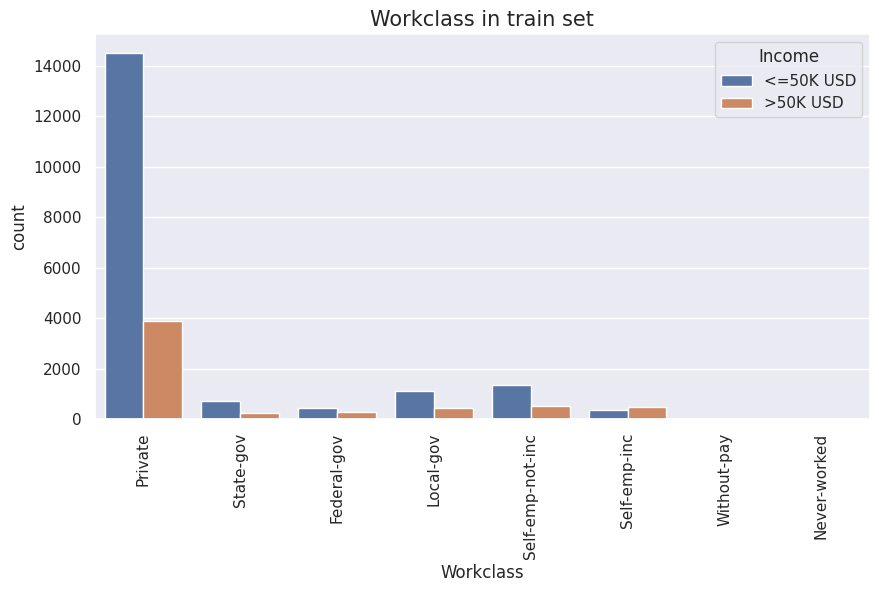

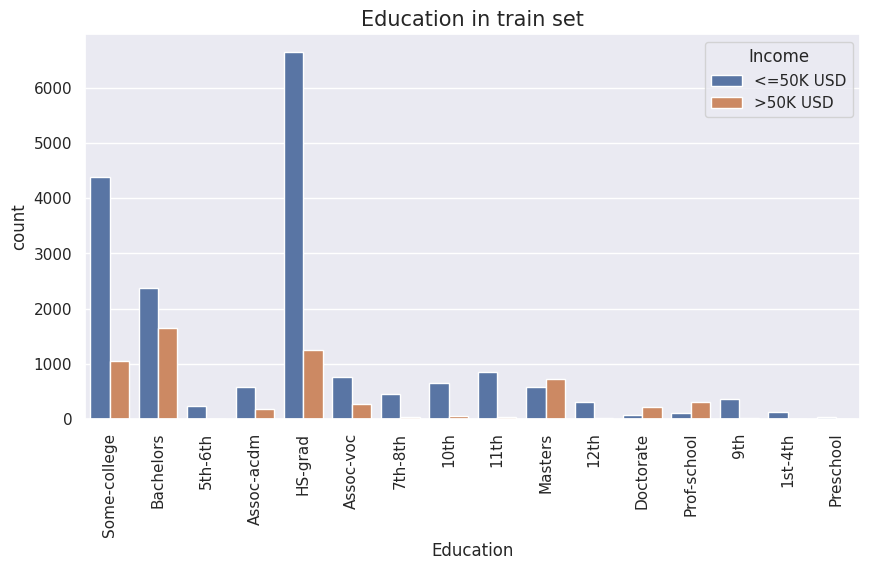

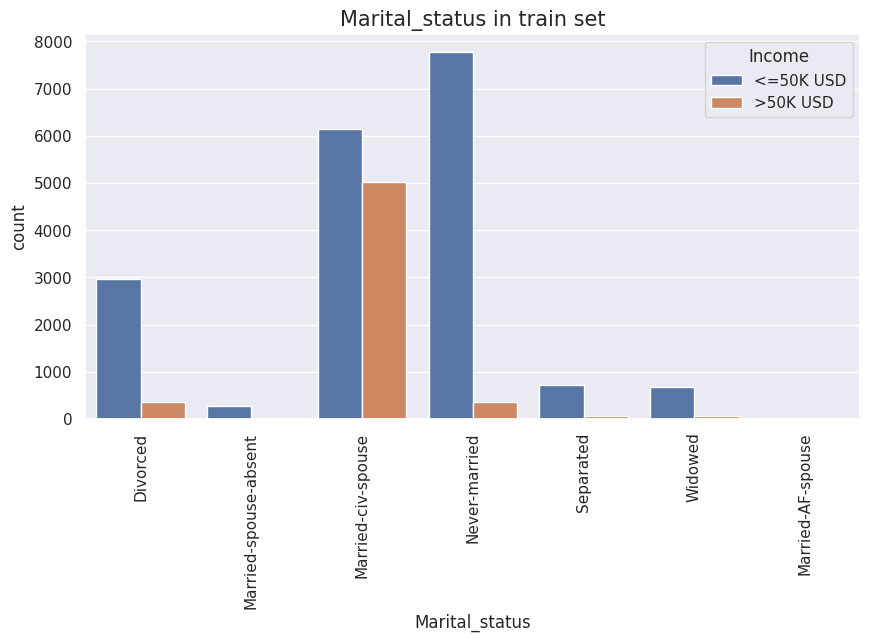

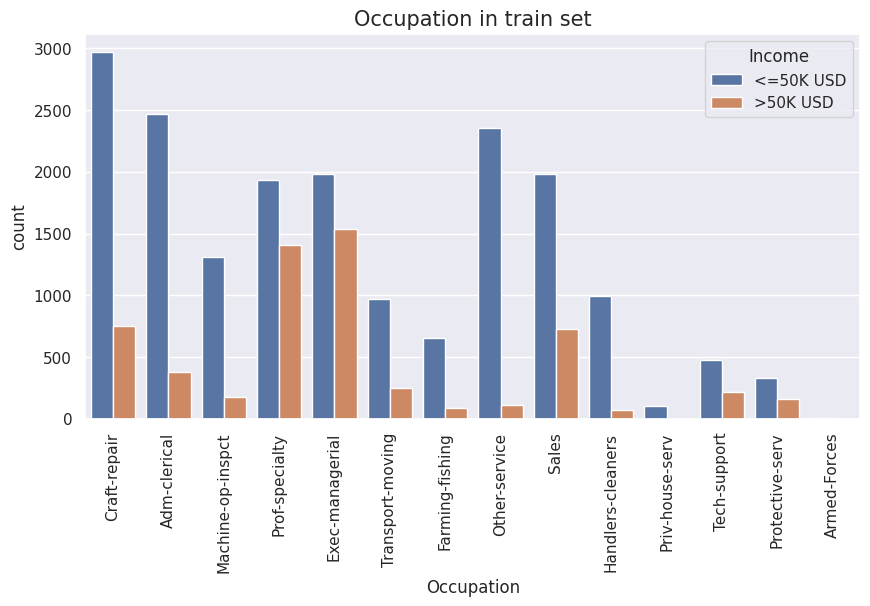

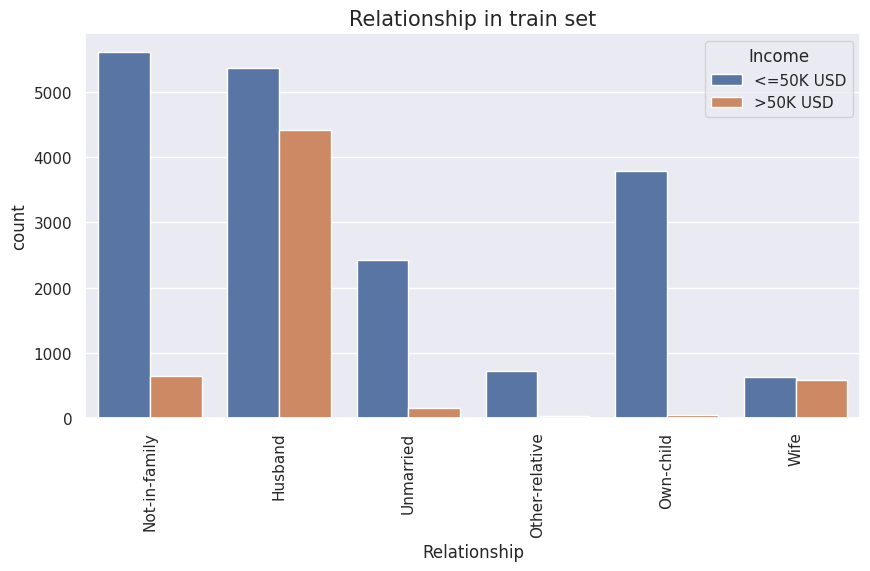

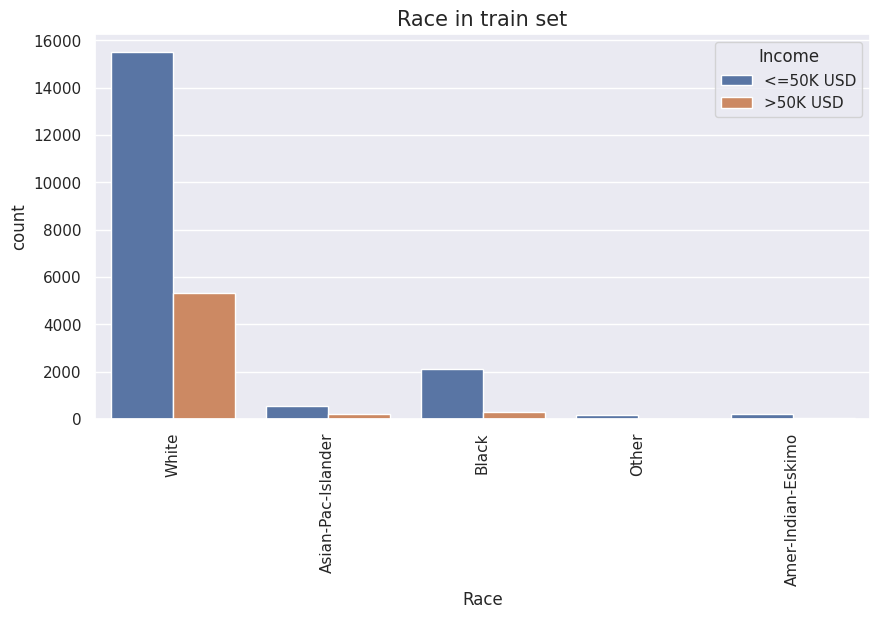

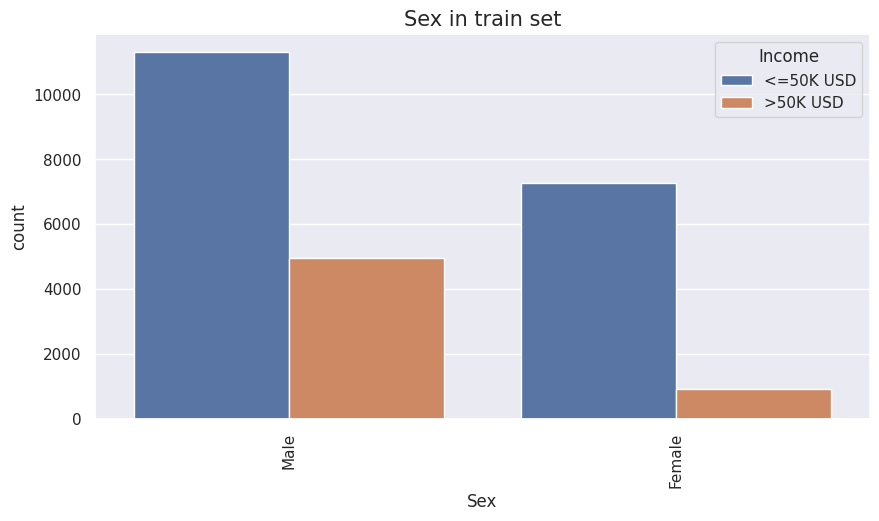

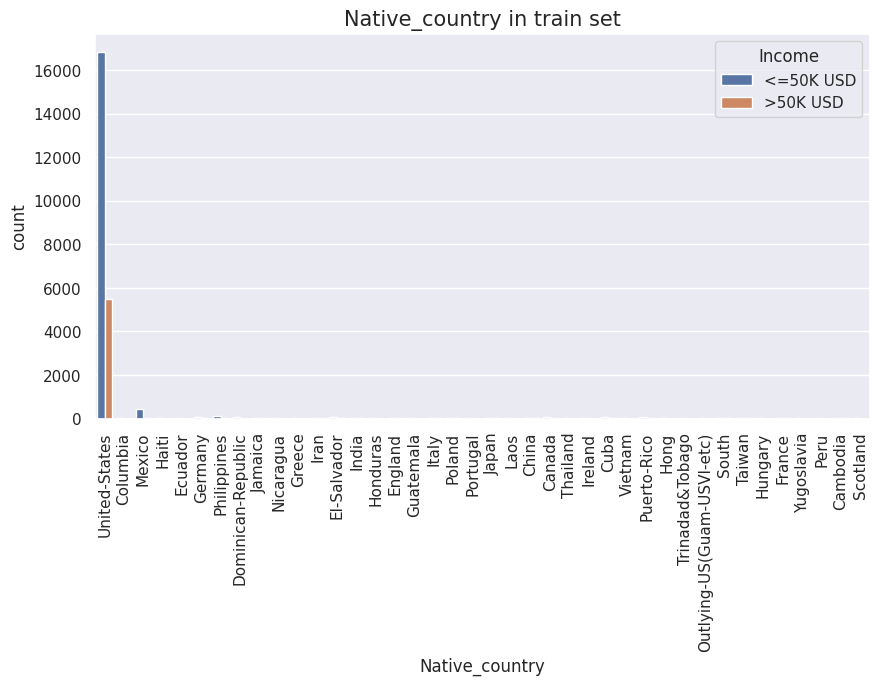

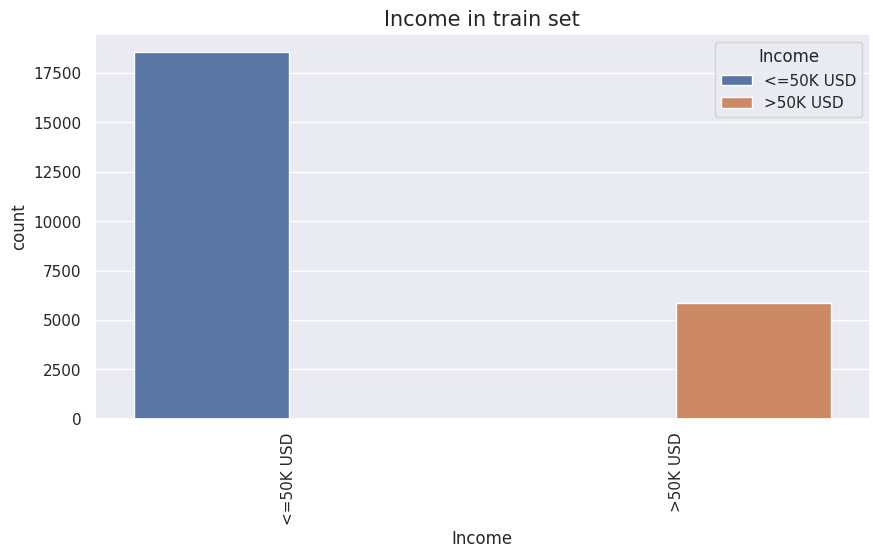

In [47]:
sns.set()
for cat in Cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=cat,data=X_train_undummified,hue='Income',hue_order=['<=50K USD','>50K USD'])
  plt.title(f"{cat} in train set",fontsize=15)
  plt.xticks(rotation=90)
  plt.savefig(f"{cat} in train.png")
  plt.show()

##Plot the distribution for the predicted test set

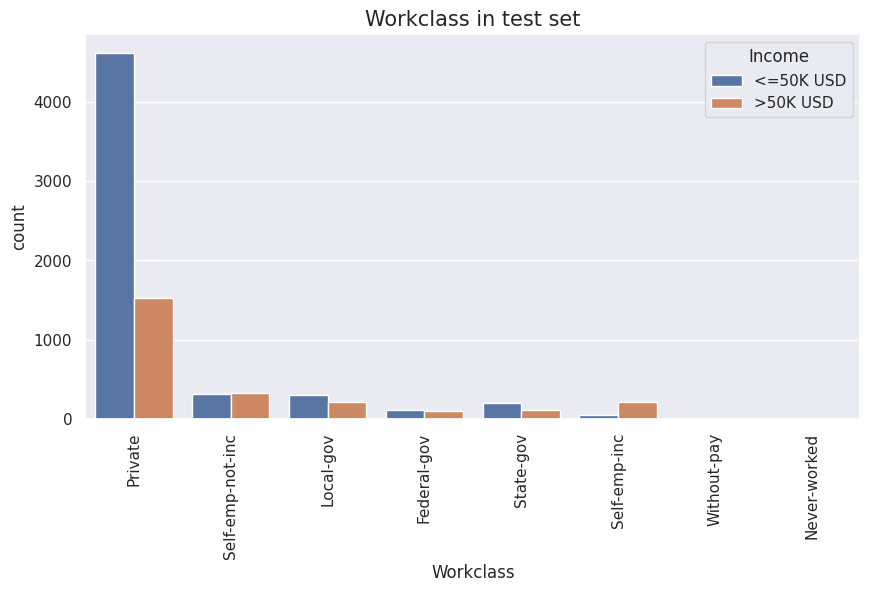

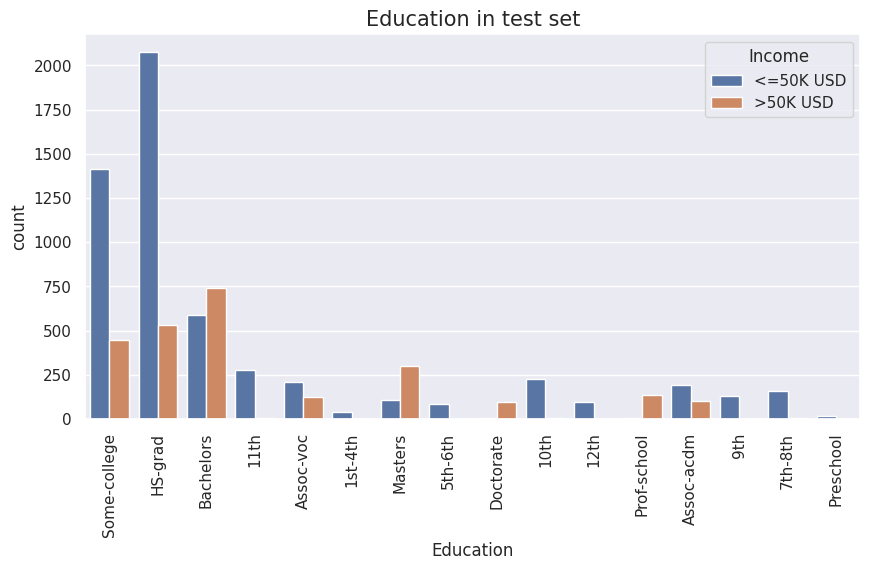

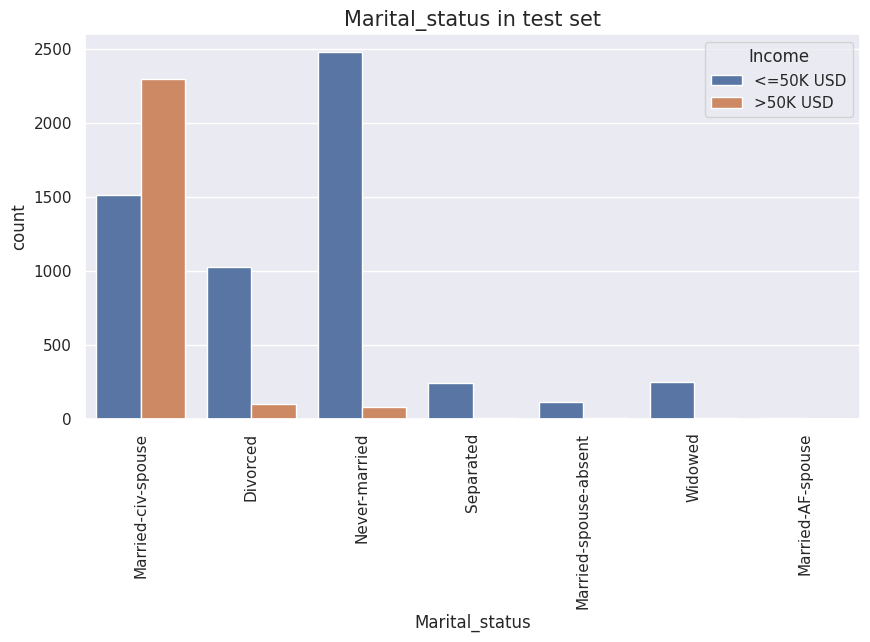

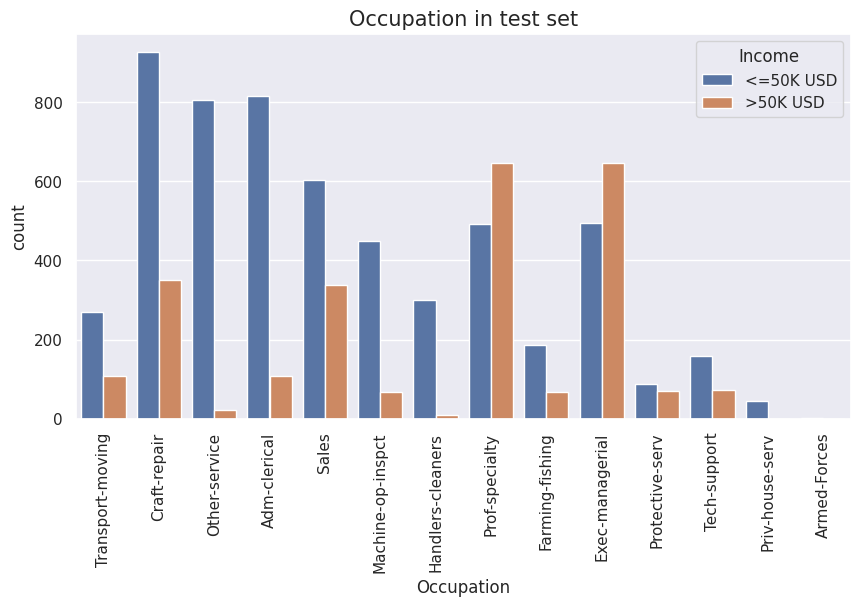

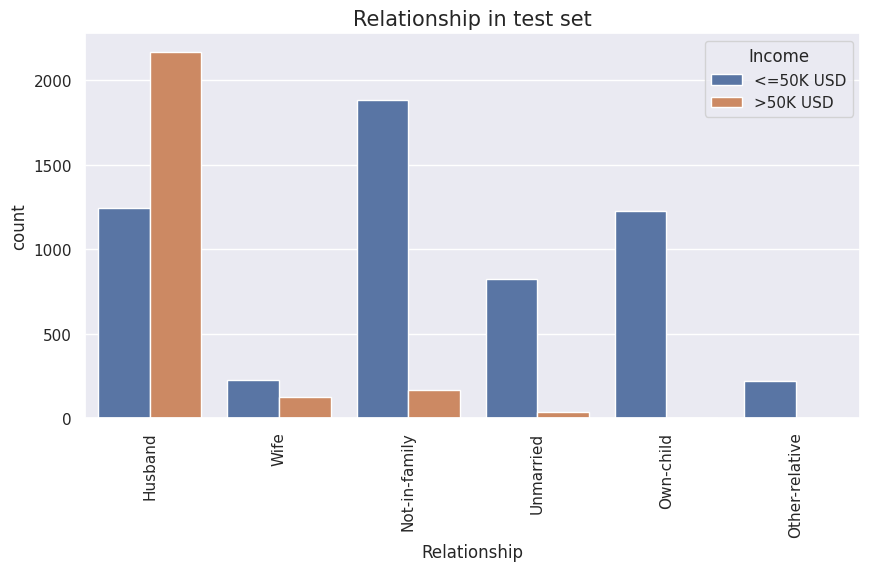

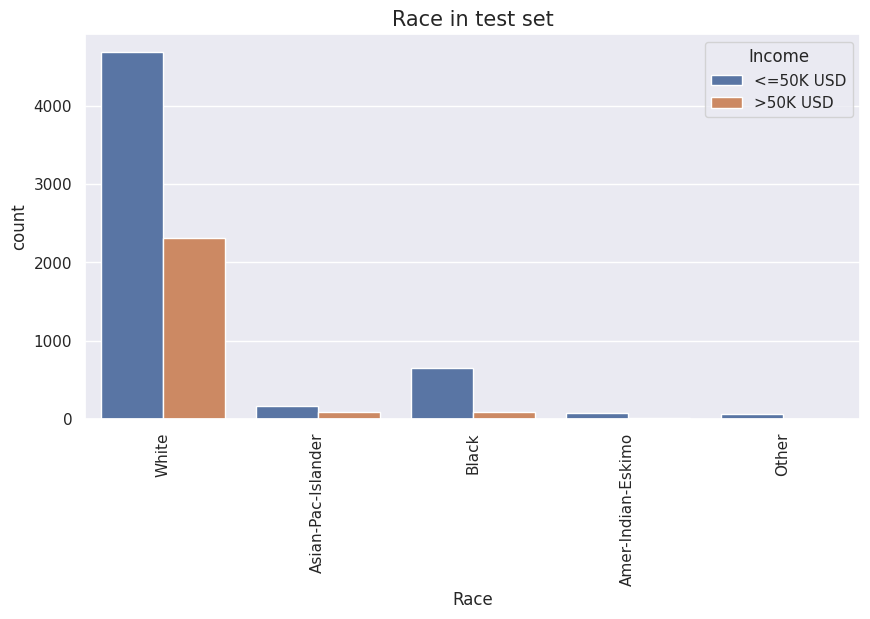

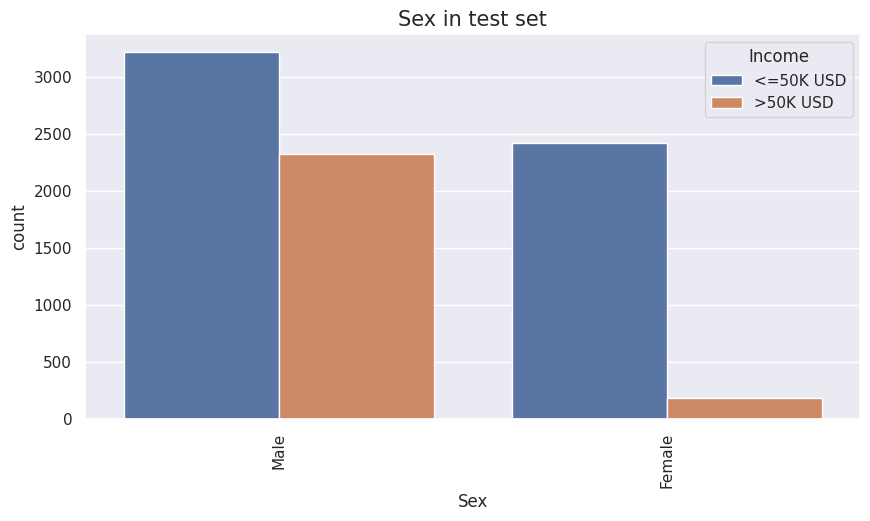

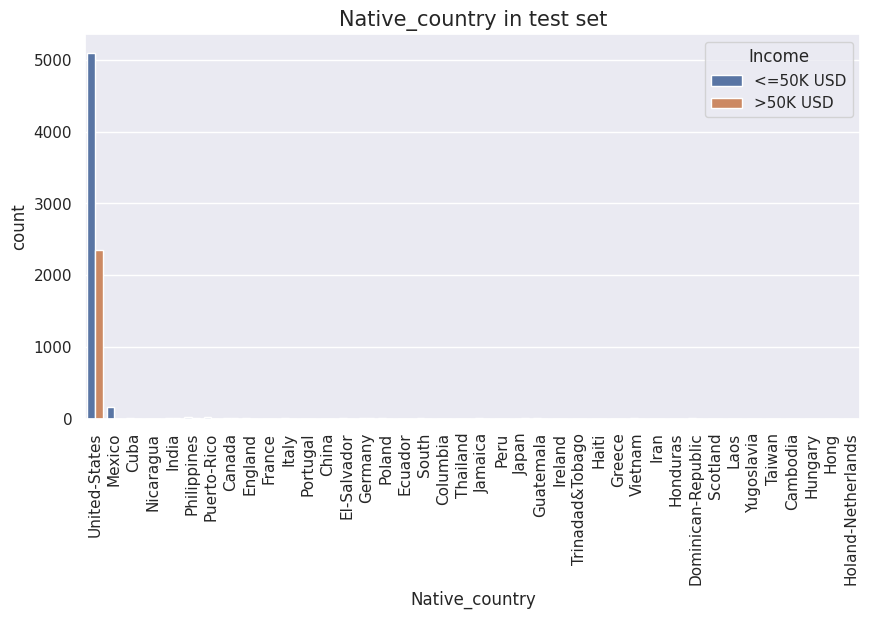

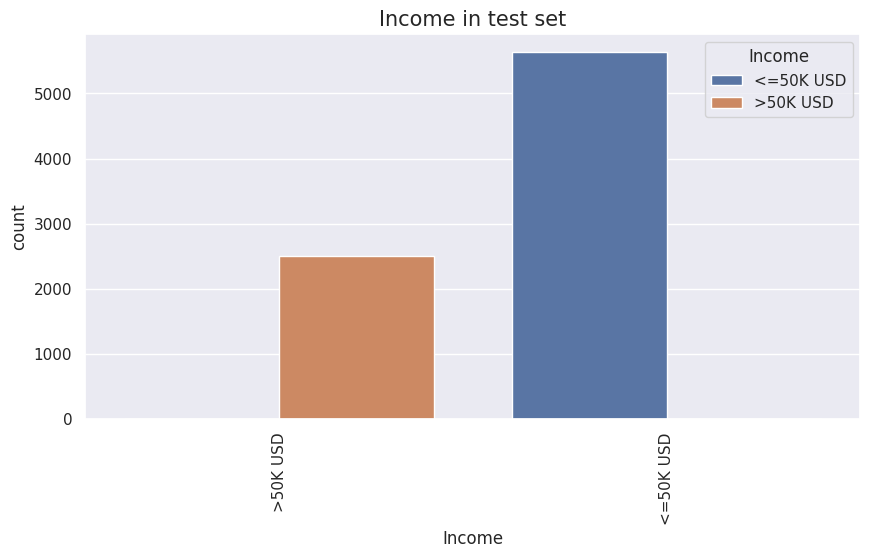

In [48]:
sns.set()
for cat in Cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=cat,data=X_test_undummified,hue='Income',hue_order=['<=50K USD','>50K USD'])
  plt.title(f"{cat} in test set",fontsize=15)
  plt.xticks(rotation=90)
  plt.savefig(f"{cat} in test.png")
  plt.show()

In [49]:
#Checking the income for each country residents
for c in X_test_undummified['Native_country'].unique():
  print(f"For {c}")
  print(X_test_undummified[X_test_undummified['Native_country']==c]['Income'].value_counts())

For United-States
<=50K USD    5098
>50K USD     2351
Name: Income, dtype: int64
For Mexico
<=50K USD    164
>50K USD       5
Name: Income, dtype: int64
For Cuba
<=50K USD    17
>50K USD      3
Name: Income, dtype: int64
For Nicaragua
<=50K USD    9
Name: Income, dtype: int64
For India
>50K USD     18
<=50K USD    11
Name: Income, dtype: int64
For Philippines
<=50K USD    36
>50K USD     17
Name: Income, dtype: int64
For Puerto-Rico
<=50K USD    27
>50K USD      2
Name: Income, dtype: int64
For Canada
<=50K USD    21
>50K USD     15
Name: Income, dtype: int64
For England
<=50K USD    16
>50K USD      6
Name: Income, dtype: int64
For France
>50K USD     4
<=50K USD    1
Name: Income, dtype: int64
For Italy
<=50K USD    12
>50K USD      5
Name: Income, dtype: int64
For Portugal
<=50K USD    5
Name: Income, dtype: int64
For China
<=50K USD    7
>50K USD     6
Name: Income, dtype: int64
For El-Salvador
<=50K USD    24
>50K USD      2
Name: Income, dtype: int64
For Germany
<=50K USD    17
>

#End of Code